# Housing Price Predictions with Multiple Linear Regression

**Laine Beatty**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The goal of this analysis was to select the most accurate multiple linear regression model for housing price predictions. The analyst validated three models with varying thresholds for the selection of predictor variables based on correlation with the sale price. The final model included 19 predictor variables and achieved a testing score of 0.85.

[Back to top](#Index)


## 1. Introduction

Three multiple linear regression models were trained and validated in order to select the most accurate model for housing price predictions. The initial data set included 100 observations with sale price, the target variable, and 79 independent variables. In a visual assessment of the sale price distribution, the sale price appeared to follow a log-normal distribution. Each model used the log transformation of sale price to account for the skewed distribution.  

Because a linear regression model requires continuous predictor and target variables, all categorical features were removed from consideration. The remaining numerical features were evaluated based on correlation with sale price. The sets of variables were selected based on correlation thresholds of 0.50, 0.35 and 0.65. The three models used 12, 19 and 8 predictor variables, respectively.  

Each model used 75 percent of the provided training data for training. The remaining 25 percent of the training data was used to obtain validation scores for model selection. The final model was evaluated on a separate test data set.


[Back to top](#Index)

## 2. The Data



[Back to top](#Index)

### 2.1 Import the Data



In [28]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

**Data description:**

* Training File: houseSmallData.csv
* Testing File: jtest.csv
* Source: Emeritus

The training data includes 100 observations with 81 fields. The fields include one identification column, 79 features and the target variable, sale price.

In [187]:
housing = pd.read_csv('houseSmallData.csv', index_col=0)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    86 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond

The testing data includes 100 additional observations with the same 81 fields.

[Back to top](#Index)

### 2.2 Data Exploration

A visual assessment of the distribution of the target variable, sale price, shows the sale price approximately follows a log-normal distribution.

Text(0, 0.5, 'Frequency')

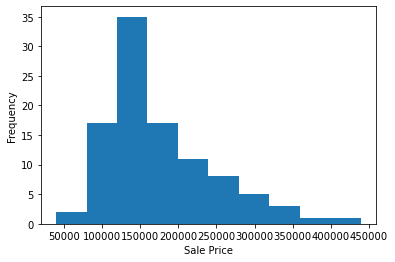

In [195]:
plt.hist(housing.SalePrice)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")

Some of the predictor variables that may prove to be important include overall quality (the overall material and finish of the house), the construction year, and the above ground living area in square feet. A visual assessment of the relationship between these variables and sale price shows a stronger relationship with overall quality and a weaker relationship with the construction year.

Text(0, 0.5, 'Sale Price')

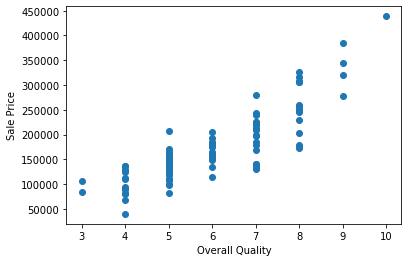

In [196]:
plt.scatter(housing.OverallQual, housing.SalePrice)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

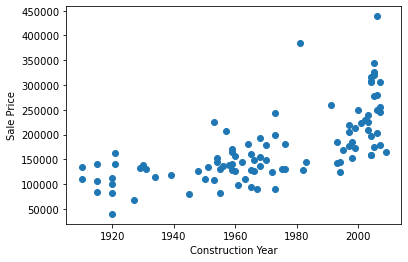

In [198]:
plt.scatter(housing.YearBuilt, housing.SalePrice)
plt.xlabel("Construction Year")
plt.ylabel("Sale Price")

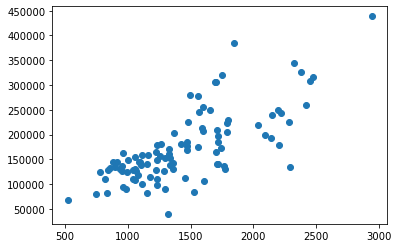

In [6]:
plt.scatter(housing.GrLivArea, housing.SalePrice)

[Back to top](#Index)

### 2.3 Data Preparation

Because a linear regression model requires continuous predictor and target variables, all categorical features were removed from consideration.


In [189]:
numeric = housing.select_dtypes(include=[np.number])
numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,NaN,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,NaN,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,NaN,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,NaN,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,NaN,0,12,2008,250000


The remaining numeric variables include several columns with missing values: pool quality, lot frontage, and the garage construction year.

In [190]:
nulls = pd.DataFrame()
nulls['Missing Values'] = numeric.isnull().sum().sort_values(ascending=False)
nulls[:4]

,Missing Values
PoolQC,100
LotFrontage,14
GarageYrBlt,6
Id,0


The missing pool quality values indicate these homes may not have pools, and associated fields may not contain accurate or relevant numbers.

In [32]:
numeric.PoolArea.value_counts()

0    100
Name: PoolArea, dtype: int64

The pool area and pool quality fields only contain zero and null values. The 'Id' field contains a sequential list with no relation to the housing observations. These fields will also be removed from consideration.

In [33]:
numeric = numeric.drop(['Id','PoolArea','PoolQC'], axis=1)
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     100 non-null    int64  
 1   LotFrontage    86 non-null     float64
 2   LotArea        100 non-null    int64  
 3   OverallQual    100 non-null    int64  
 4   OverallCond    100 non-null    int64  
 5   YearBuilt      100 non-null    int64  
 6   YearRemodAdd   100 non-null    int64  
 7   MasVnrArea     100 non-null    float64
 8   BsmtFinSF1     100 non-null    int64  
 9   BsmtFinSF2     100 non-null    int64  
 10  BsmtUnfSF      100 non-null    int64  
 11  TotalBsmtSF    100 non-null    int64  
 12  1stFlrSF       100 non-null    int64  
 13  2ndFlrSF       100 non-null    int64  
 14  LowQualFinSF   100 non-null    int64  
 15  GrLivArea      100 non-null    int64  
 16  BsmtFullBath   100 non-null    int64  
 17  BsmtHalfBath   100 non-null    int64  
 18  FullBath   

The training data will be split into training and validation sets with the scikit-learn function, train_test_split. To prepare the data, the predictor and target variables were divided into a data frame and a separate series. A log transformation was applied to the target variable to account for the log-normal distribution shown in the data exploration.

In [124]:
X = numeric.drop(['SalePrice'], axis=1)
y = np.log(numeric.SalePrice)
print(f"Predictors: {X.shape}, Target variable: {y.shape}")

Predictors: (100, 35), Target variable: (100,)


A visual assessment of the log-transformed target variables shows an approximately normal distribution.

Text(0, 0.5, 'Frequency')

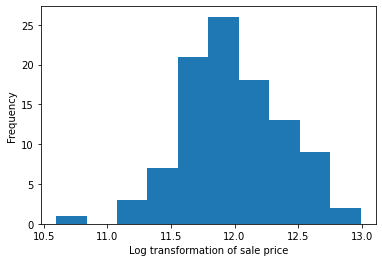

In [199]:
plt.hist(y)
plt.xlabel("Log transformation of sale price")
plt.ylabel("Frequency")

25 percent of the training data was set aside for validation. The three models will be assessed based on validation rather than training scores to prevent overfitting in the final model.

In [126]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training predictors: {X_train.shape}, Validation predictors: {X_val.shape}")
print(f"Training target: {y_train.shape}, Validation target: {y_val.shape}")

Training predictors: (75, 35), Validation predictors: (25, 35)
Training target: (75,), Validation target: (25,)


[Back to top](#Index)

### 2.4 Correlation



The training sets were combined to assess correlation between the sale price and predictor variables. To prevent overfitting in the final model, the validation data was excluded from this assessment.

In [191]:
train = X_train
train['SalePrice'] = y_train
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
15,45,51.0,6120,7,8,1929,2001,0.0,0,0,...,576,48,112,0,0,0,0,7,2007,11.790557
40,20,84.0,8658,6,5,1965,1965,101.0,643,0,...,440,0,138,0,0,0,0,12,2006,11.982929
96,20,78.0,10264,7,5,1999,1999,183.0,1162,0,...,472,158,29,0,0,0,0,8,2006,12.273731
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,205,0,4,0,0,0,0,1,2008,11.678440
72,60,74.0,10141,7,5,1998,1998,40.0,0,0,...,427,0,94,0,0,291,0,12,2009,12.128111


In [132]:
corr = train.corr()
corrSP = pd.DataFrame(corr.SalePrice.sort_values(ascending=False))
corrSP

,SalePrice
SalePrice,1.000000
OverallQual,0.836827
GrLivArea,0.752925
YearBuilt,0.700564
FullBath,0.693281
GarageYrBlt,0.680772
GarageCars,0.655318
YearRemodAdd,0.654029
GarageArea,0.650515
TotalBsmtSF,0.618335


A number of variables showed strong positive correlations with sale price. The negative correlations are fairly weak, as the strongest negative correlation is -0.28.

The three sets of predictor variables will be selected based on correlation thresholds of 0.5, 0.65 and 0.35. A visual assessment of the 8 most correlated variables, the smallest set that will be used, shows some multicollinearity among the independent variables that would likely be removed in models based on statistical significance.

<AxesSubplot:>

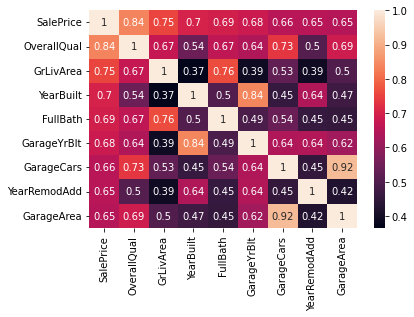

In [193]:
topcorr = corrSP[:9].index
corrmap = corr.loc[topcorr,topcorr]
sns.heatmap(corrmap, annot=True)


[Back to top](#Index)

## 3. Project Description

Based on the provided variable selection method of correlation with the target variable, this analysis identifies the approximate optimal correlation threshold for variable selection. The three models used sets of predictor variables based on sale price correlation thresholds of 0.5, 0.65 and 0.35. These thresholds resulted in sets of 12, 19 and 8 predictor variables, respectively.


[Back to top](#Index)

### 3.1 Linear Regression

This analysis utilized the scikit-learn linear regression model, which is based on the ordinary least squares. The `LinearRegression()` function fits a line that minimizes the residual sum of squares between the observations and target variable in the training data. The function uses the squared residual of each observation to find the line that minimizes the total distance between all of the predictions and observed values.

The `LinearRegression()` function is based on the mathematical function:

$\min_{\substack{w}} ||Xw - y||  \begin{array}{rcl}2\\2\end{array}$


In [43]:
lr = linear_model.LinearRegression()

[Back to top](#Index)

### 3.2 Analysis 


#### Model 1

The first model uses all predictor variables that have a 0.50 or greater correlation with the sale price, resulting in 12 predictor variables.

In [183]:
col1 = corrSP[abs(corrSP.SalePrice) > .5].index
col1 = col1[1:]
nvar1 = len(col1)
print(f"The model will include {len(col1)} independent variables.")

The model will include 12 independent variables.


In [135]:
X1 = X_train[col1]
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 51
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   75 non-null     int64  
 1   GrLivArea     75 non-null     int64  
 2   YearBuilt     75 non-null     int64  
 3   FullBath      75 non-null     int64  
 4   GarageYrBlt   71 non-null     float64
 5   GarageCars    75 non-null     int64  
 6   YearRemodAdd  75 non-null     int64  
 7   GarageArea    75 non-null     int64  
 8   TotalBsmtSF   75 non-null     int64  
 9   TotRmsAbvGrd  75 non-null     int64  
 10  MasVnrArea    75 non-null     float64
 11  1stFlrSF      75 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 7.6 KB


To implement the linear regression fit in scikit-learn, all null values are interpolated with the linear method. The linear method treats the values as equally spaced on a linear regression.

In [194]:
X1 = X1.interpolate()
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 51
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   75 non-null     int64  
 1   GrLivArea     75 non-null     int64  
 2   YearBuilt     75 non-null     int64  
 3   FullBath      75 non-null     int64  
 4   GarageYrBlt   75 non-null     float64
 5   GarageCars    75 non-null     int64  
 6   YearRemodAdd  75 non-null     int64  
 7   GarageArea    75 non-null     int64  
 8   TotalBsmtSF   75 non-null     int64  
 9   TotRmsAbvGrd  75 non-null     int64  
 10  MasVnrArea    75 non-null     float64
 11  1stFlrSF      75 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 7.6 KB


In [148]:
m1 = lr.fit(X1, y_train)
pred1 = np.exp(m1.predict(X1))
tscore1 = m1.score(X1, y_train)
print(f"The training R-squared is: {tscore1}")

X1v = X_val[col1].interpolate()
pred1v = np.exp(m1.predict(X1v))
vscore1 = m1.score(X1v, y_val)
print(f"The validation R-squared is: {vscore1}")

The training R-squared is: 0.889996749966008
The validation R-squared is: 0.770424208707842


Text(0, 0.5, 'Actual Housing Prices')

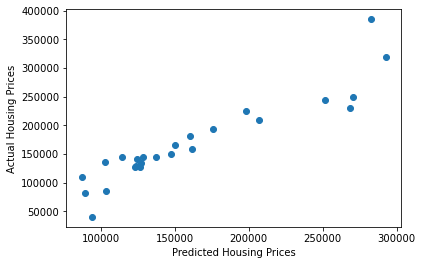

In [181]:
plt.scatter(pred1v, np.exp(y_val))
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")

#### Model 2

The second model uses a correlation threshold of 0.35, resulting in 19 predictor variables.

In [184]:
col2 = corrSP[abs(corrSP.SalePrice) > .35].index
col2 = col2.drop(['SalePrice'])
nvar2 = len(col2)
print(f"The model will include {len(col2)} independent variables.")

The model will include 19 independent variables.


In [167]:
X2 = X_train[col2].interpolate()
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 51
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   75 non-null     int64  
 1   GrLivArea     75 non-null     int64  
 2   YearBuilt     75 non-null     int64  
 3   FullBath      75 non-null     int64  
 4   GarageYrBlt   75 non-null     float64
 5   GarageCars    75 non-null     int64  
 6   YearRemodAdd  75 non-null     int64  
 7   GarageArea    75 non-null     int64  
 8   TotalBsmtSF   75 non-null     int64  
 9   TotRmsAbvGrd  75 non-null     int64  
 10  MasVnrArea    75 non-null     float64
 11  1stFlrSF      75 non-null     int64  
 12  LotArea       75 non-null     int64  
 13  Fireplaces    75 non-null     int64  
 14  BedroomAbvGr  75 non-null     int64  
 15  2ndFlrSF      75 non-null     int64  
 16  BsmtUnfSF     75 non-null     int64  
 17  LotFrontage   75 non-null     float64
 18  HalfBath      75 non-null     i

In [168]:
m2 = lr.fit(X2, y_train)
pred2 = np.exp(m2.predict(X2))
tscore2 = m2.score(X2, y_train)
print(f"The training R-squared is: {tscore2}")

X2v = X_val[col2].interpolate()
pred2v = np.exp(m2.predict(X2v))
vscore2 = m2.score(X2v, y_val)
print(f"The validation R-squared is: {vscore2}")

The training R-squared is: 0.9213069781818244
The validation R-squared is: 0.7820913664386266


Text(0, 0.5, 'Actual Housing Prices')

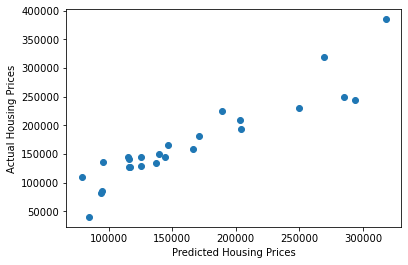

In [180]:
plt.scatter(pred2v, np.exp(y_val))
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")

#### Model 3

The third model uses a correlation threshold of 0.65, resulting in 8 predictor variables.

In [185]:
col3 = corrSP[abs(corrSP.SalePrice) > .65].index
col3 = col3.drop(['SalePrice'])
nvar3 = len(col3)
print(f"The model will include {len(col3)} independent variables.")

The model will include 8 independent variables.


In [142]:
X3 = X_train[col3].interpolate()
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 15 to 51
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   75 non-null     int64  
 1   GrLivArea     75 non-null     int64  
 2   YearBuilt     75 non-null     int64  
 3   FullBath      75 non-null     int64  
 4   GarageYrBlt   75 non-null     float64
 5   GarageCars    75 non-null     int64  
 6   YearRemodAdd  75 non-null     int64  
 7   GarageArea    75 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.3 KB


In [154]:
m3 = lr.fit(X3, y_train)
pred3 = np.exp(m3.predict(X3))
tscore3 = m3.score(X3, y_train)
print(f"The training R-squared is: {tscore3}")

X3v = X_val[col3].interpolate()
pred3v = np.exp(m3.predict(X3v))
vscore3 = m3.score(X3v, y_val)
print(f"The validation R-squared is: {vscore3}")

The training R-squared is: 0.8706443362763432
The validation R-squared is: 0.7412682704354414


Text(0, 0.5, 'Actual Housing Prices')

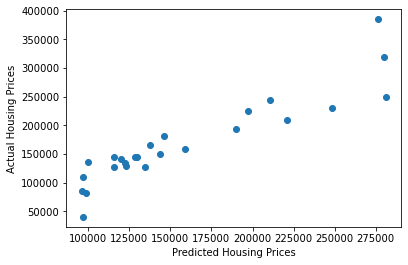

In [179]:
plt.scatter(pred3v, np.exp(y_val))
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")

[Back to top](#Index)

### 3.3 Results

In linear regression, the training and validation scores are calculated using $R^2$, which represents the portion of the variance in the target variable explained by the predictor variables. The second model achieves the highest training and validation scores. In linear regression, additional correlated predictor variables are able to explain more of the variance in the target variable, resulting in a higher $R^2$.  

In [186]:
scores = {'Number of Predictors':[nvar1,nvar2,nvar3],
          'Training Score':[tscore1, tscore2, tscore3],
          'Validation Score':[vscore1, vscore2, vscore3]}
results = pd.DataFrame(scores)
results.index = ['Model 1', 'Model 2', 'Model 3']
results

,Number of Predictors,Training Score,Validation Score
Model 1,12,0.889997,0.770424
Model 2,19,0.921307,0.782091
Model 3,8,0.870644,0.741268


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data


In [111]:
test = pd.read_csv('jtest.csv', index_col=0)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 100 to 199
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    78 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          3 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallC

In [173]:
X_test = test[col2].interpolate().dropna()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 101 to 199
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   99 non-null     int64  
 1   GrLivArea     99 non-null     int64  
 2   YearBuilt     99 non-null     int64  
 3   FullBath      99 non-null     int64  
 4   GarageYrBlt   99 non-null     float64
 5   GarageCars    99 non-null     int64  
 6   YearRemodAdd  99 non-null     int64  
 7   GarageArea    99 non-null     int64  
 8   TotalBsmtSF   99 non-null     int64  
 9   TotRmsAbvGrd  99 non-null     int64  
 10  MasVnrArea    99 non-null     float64
 11  1stFlrSF      99 non-null     int64  
 12  LotArea       99 non-null     int64  
 13  Fireplaces    99 non-null     int64  
 14  BedroomAbvGr  99 non-null     int64  
 15  2ndFlrSF      99 non-null     int64  
 16  BsmtUnfSF     99 non-null     int64  
 17  LotFrontage   99 non-null     float64
 18  HalfBath      99 non-null    

In [174]:
y_test = np.log(test.SalePrice[X_test.index])
y_test.shape

(99,)

Using the log transformation of sale price results in an approximately normal distribution.

(array([ 3.,  7., 19., 14., 21., 16.,  9.,  5.,  3.,  2.]),
 array([11.27720313, 11.46208588, 11.64696863, 11.83185139, 12.01673414,
        12.20161689, 12.38649964, 12.57138239, 12.75626514, 12.94114789,
        13.12603064]),
 <BarContainer object of 10 artists>)

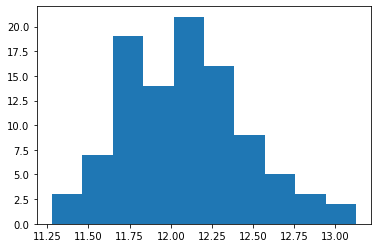

In [175]:
plt.hist(y_test)

In [176]:
test_preds = np.exp(m2.predict(X_test))
test_score = m2.score(X_test, y_test)
print(f"The testing R-squared is: {test_score}")

The testing R-squared is: 0.8464671045090927


Text(0, 0.5, 'Actual Housing Prices')

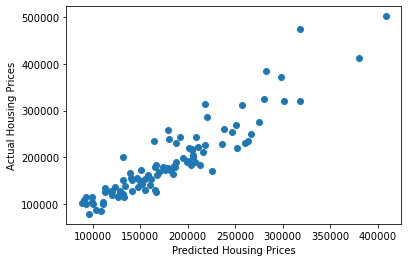

In [178]:
plt.scatter(test_preds, np.exp(y_test))
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")

The final model explains 84.6 percent of the variation in sale price. The higher validation score affirms the lack of overfitting in the linear regression model and the use of a higher correlation threshold in multiple linear regression.

[Back to top](#Index)

## Conclusion

The model with the lowest correlation threshold and highest number of predictor variables was able to achieve the highest $R^2$. These results may not apply to other machine learning algorithms or scoring metrics due to issues such as multicollinearity among the independent variables.




[Back to top](#Index)


## References

- Pedregosa, F., et al. “Linear Models - Scikit-Learn 1.2.1 Documentation.” Scikit-learn: Machine Learning in Python. February 7, 2023. https://scikit-learn.org/stable/modules/linear_model.html.

- Pedregosa, F., et al. “Scikit-learn: Machine Learning in Python.” Journal of Machine Learning Research Volume 12 (2011): 2825-2830.